# git clone 후 저장된 class import 

In [3]:
! git clone https://github.com/Chuck2Win/Nexon-Tire.git

Cloning into 'Nexon-Tire'...


In [50]:
cd Nexon-Tire

from train_model import *

f = open('./else/train_model_else','rb')

non_sequential = pickle.load(f)


In [51]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import argparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score#,mean_absolute_error
import math
import os
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pickle
from matplotlib import pyplot as plt

In [104]:
# feature의 이름
f = open('./preprocessing/columns_memo','rb')
columns_memo = pickle.load(f)
f.close()

# one hot encoder dictionary
ff = open('./preprocessing/onehot_columns_memo','rb')
one_hot_memo = pickle.load(ff)
ff.close()
one_hot_memo = {i:j for j,i in one_hot_memo.items()}

columns=[]
for i in columns_memo:
    if one_hot_memo.get(i):
        columns.append(one_hot_memo.get(i))
    else:
        columns.append(i)



Data60


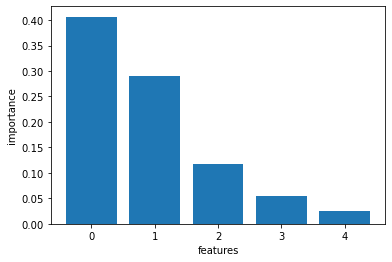

['x0_1300D/2P 30EPI', 'x0_HTLS 1500D/2P 47.4/5cm', 'x1_WKD180', 'x0_2000D/2P 25EPI', 'x0_1300D/2P 32EPI']
Data61


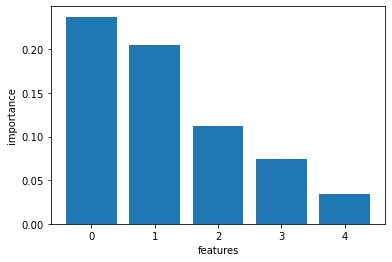

['x3_CLASSE PREMIERE CP671', 'x7_C027', 'x3_AS-S01', 'x3_ASPEN GT-AS', 'x0_HTLS 1500D/2P-55.1/5cm']
Data62


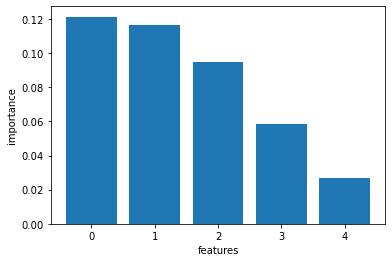

['x6_TV62', 'Data11', 'x11_2P', "x3_N'FERA Primus QX", 'x6_TY62']
Data63


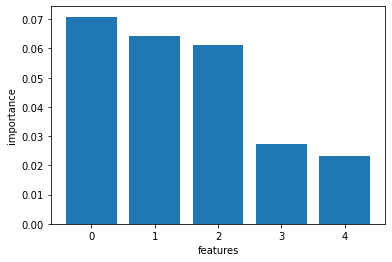

['x6_TD94', 'x12_1F', 'x3_CLASSE PREMIERE CP671', 'x6_TE55', 'x6_TB64']


In [109]:
k = 5
for y in non_sequential.save_models.keys():
    print(y)
    model = non_sequential.save_models[y]['xg']
    fi = model.feature_importances_
    new_ = [(i,j) for i,j in zip(columns,fi)]
    new_ = sorted(new_,key = lambda i : i[1],reverse = True)
    feature_importance = df()
    input = {y : [i[1] for i in new_]}
    index = [i[0] for i in new_]
    df(input,index = index).to_csv('./result/%s.csv'%y)
    label_k=[i[0] for i in new_][:k]
    new_k=[i[1] for i in new_][:k]
    plt.bar(range(k),new_k)
    plt.xlabel('features')
    plt.ylabel('importance')
    #plt.xticks(range(30),label_30)
    plt.show()
    print(label_k)
    
    
# model = non_sequential.save_models['xg']